# Acc 1 Stock Performance Tracker


## Setup


In [1]:
import contextlib

import pandas as pd

import const
import draw_utils
import process_utils

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [3]:
acc_name = const.ACC1_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [4]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [5]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


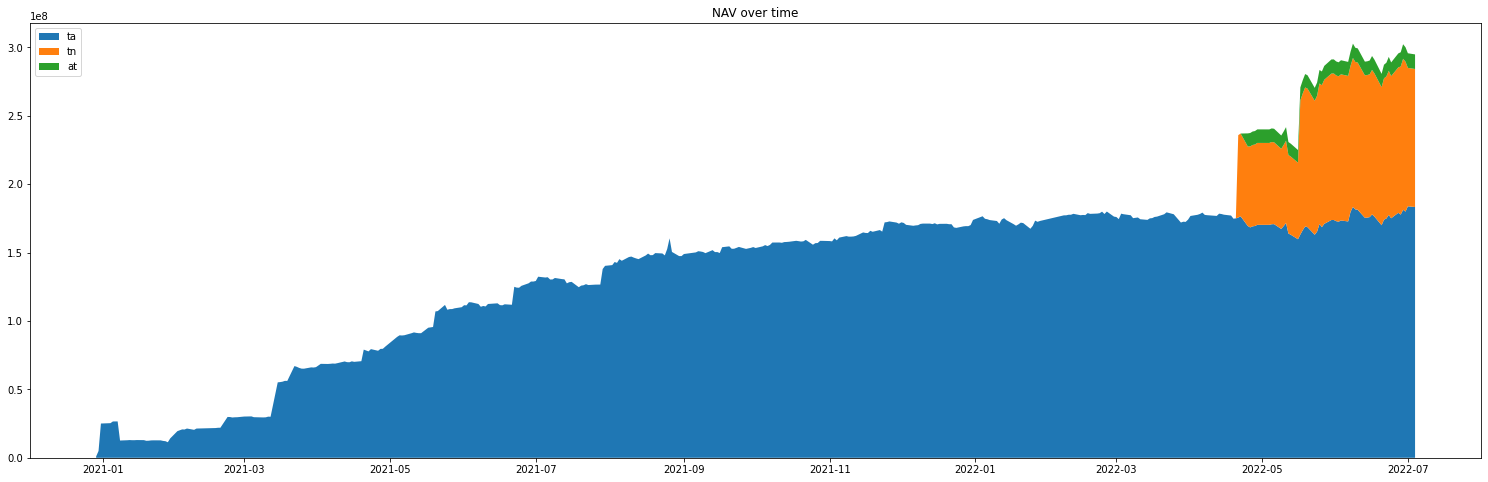

In [6]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


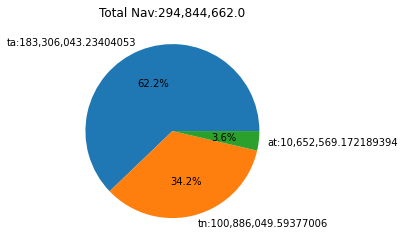

In [7]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


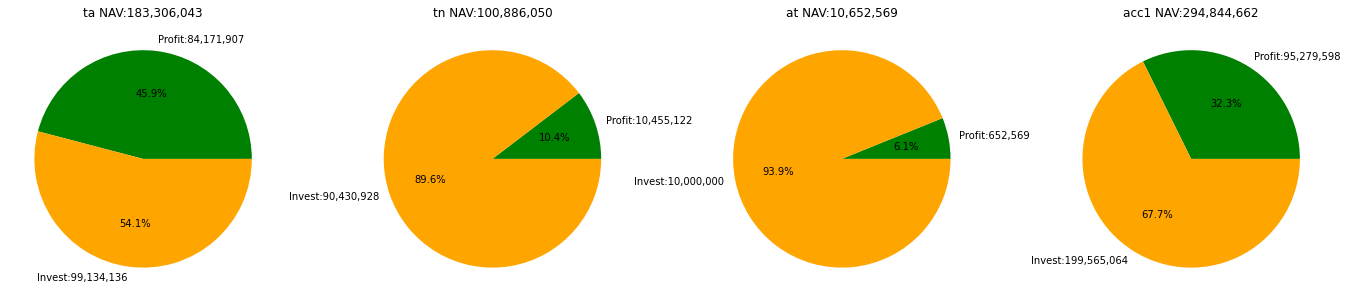

In [8]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


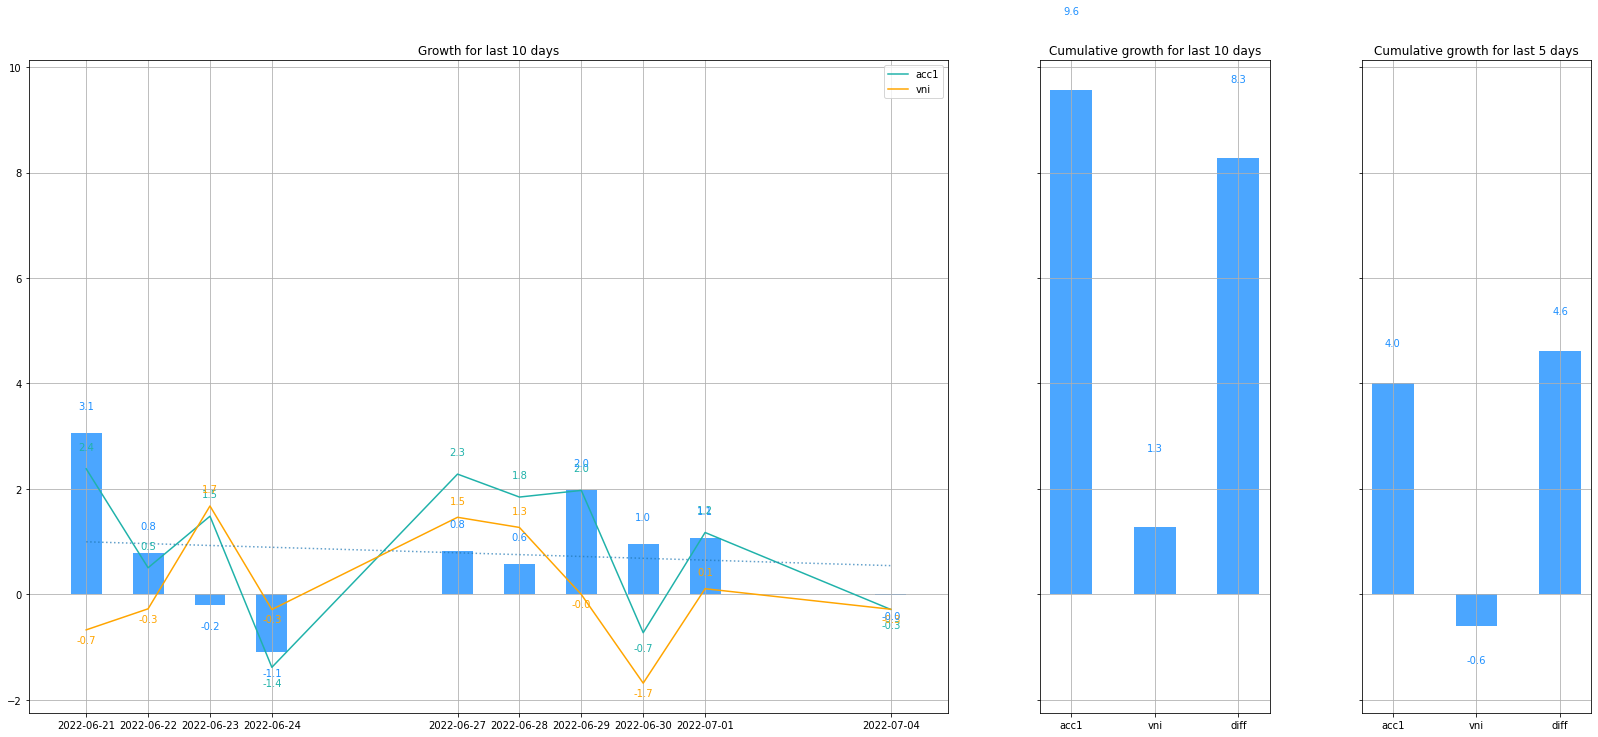

In [9]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [10]:
# user_df.tail(10)


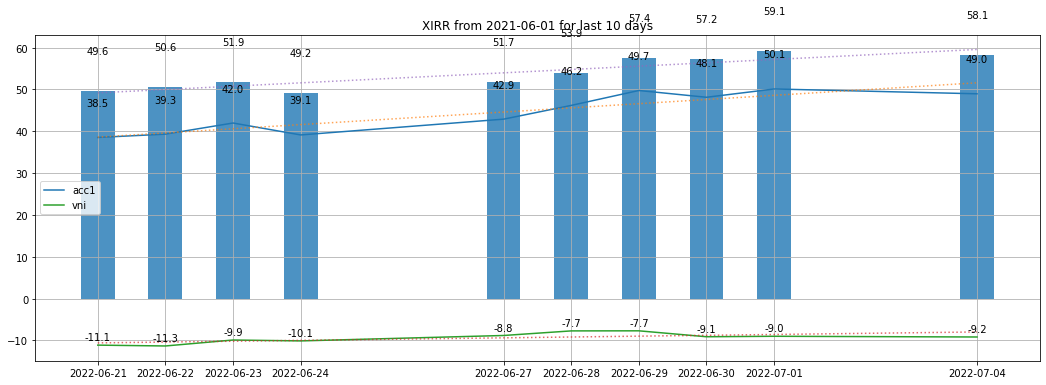

In [11]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


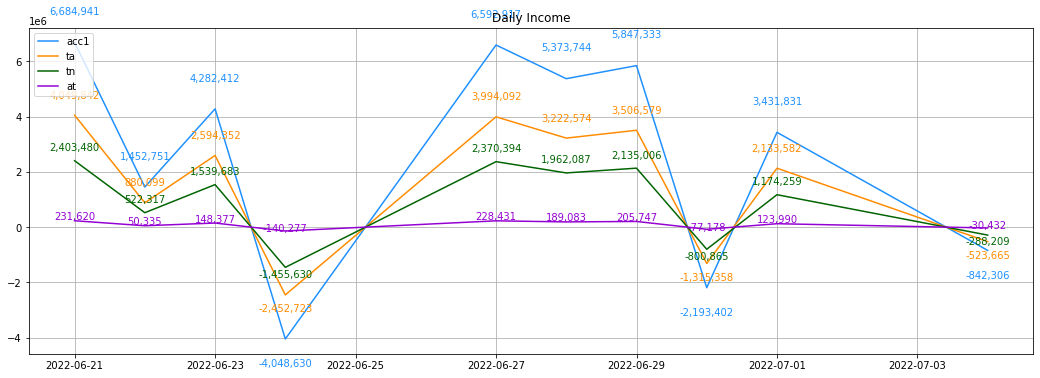

In [12]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


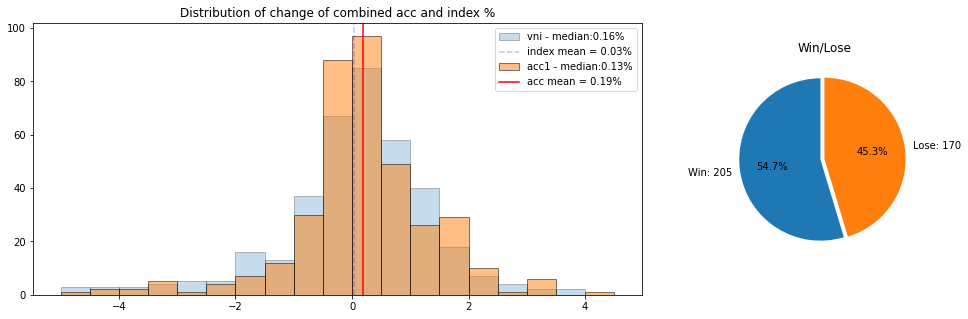

In [13]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [14]:
anchor_date = "2022-4-21"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


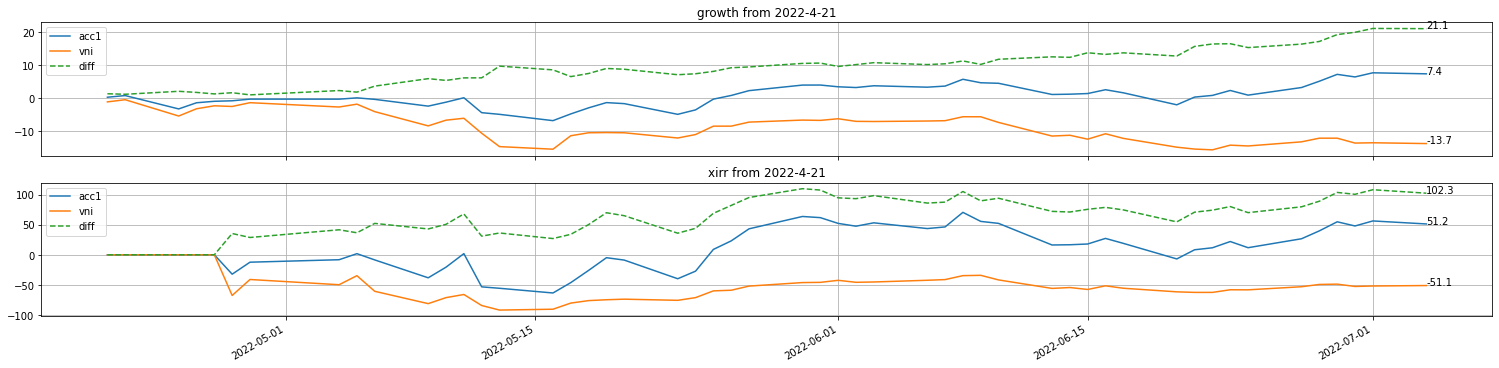

In [15]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [16]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


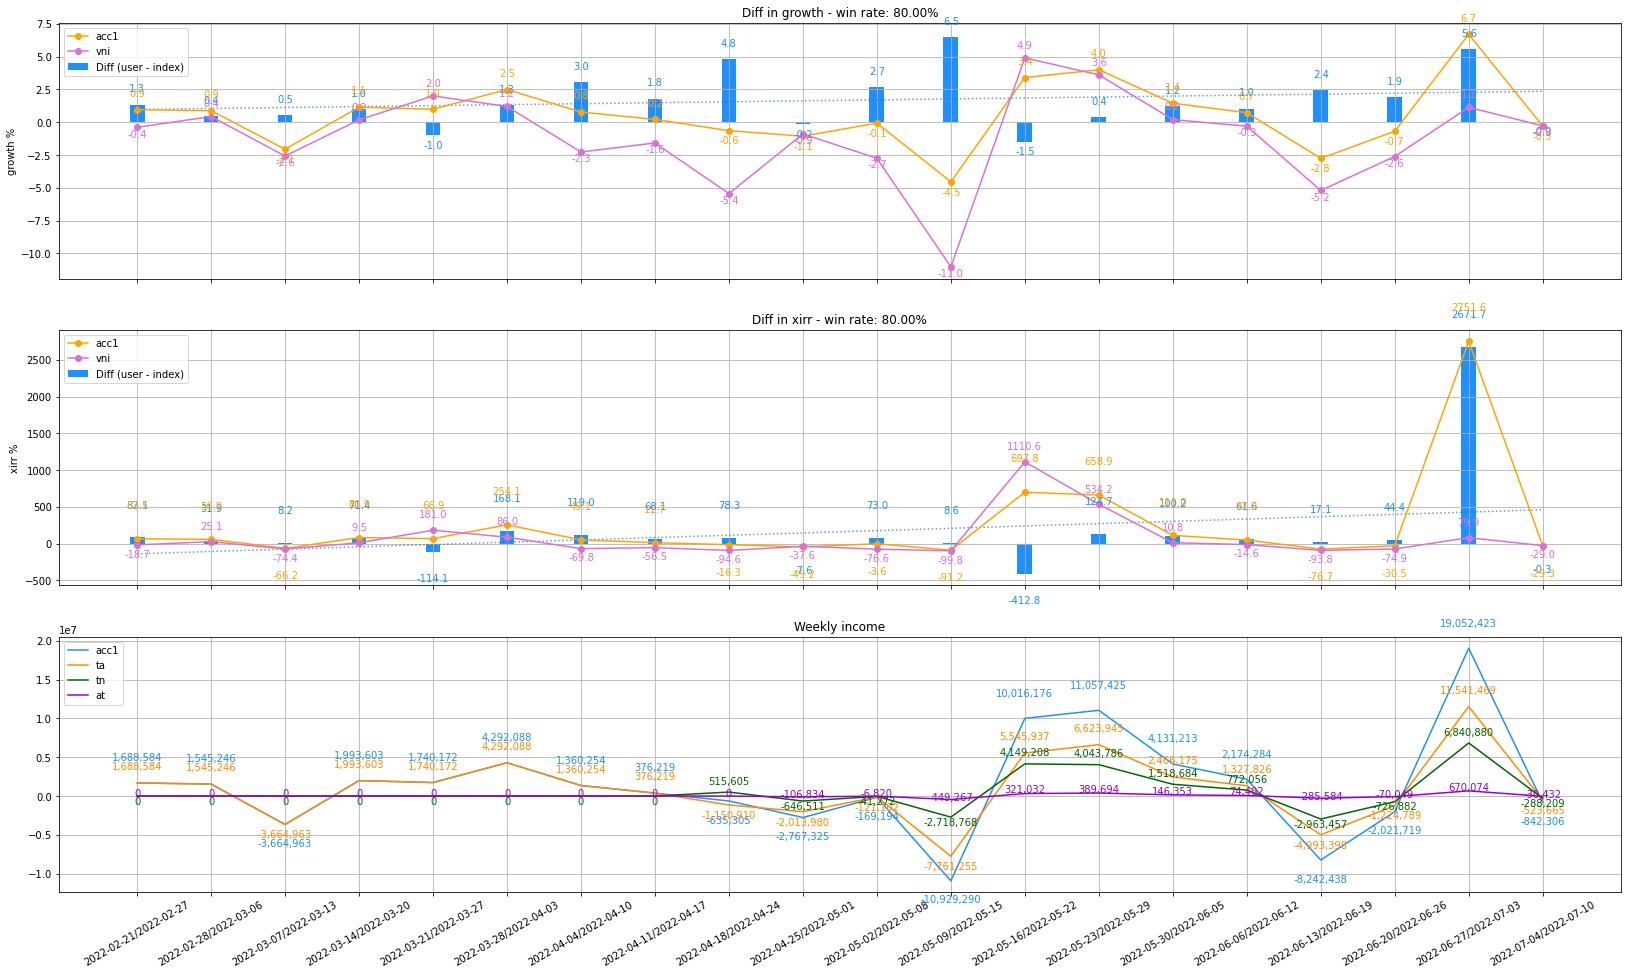

In [17]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


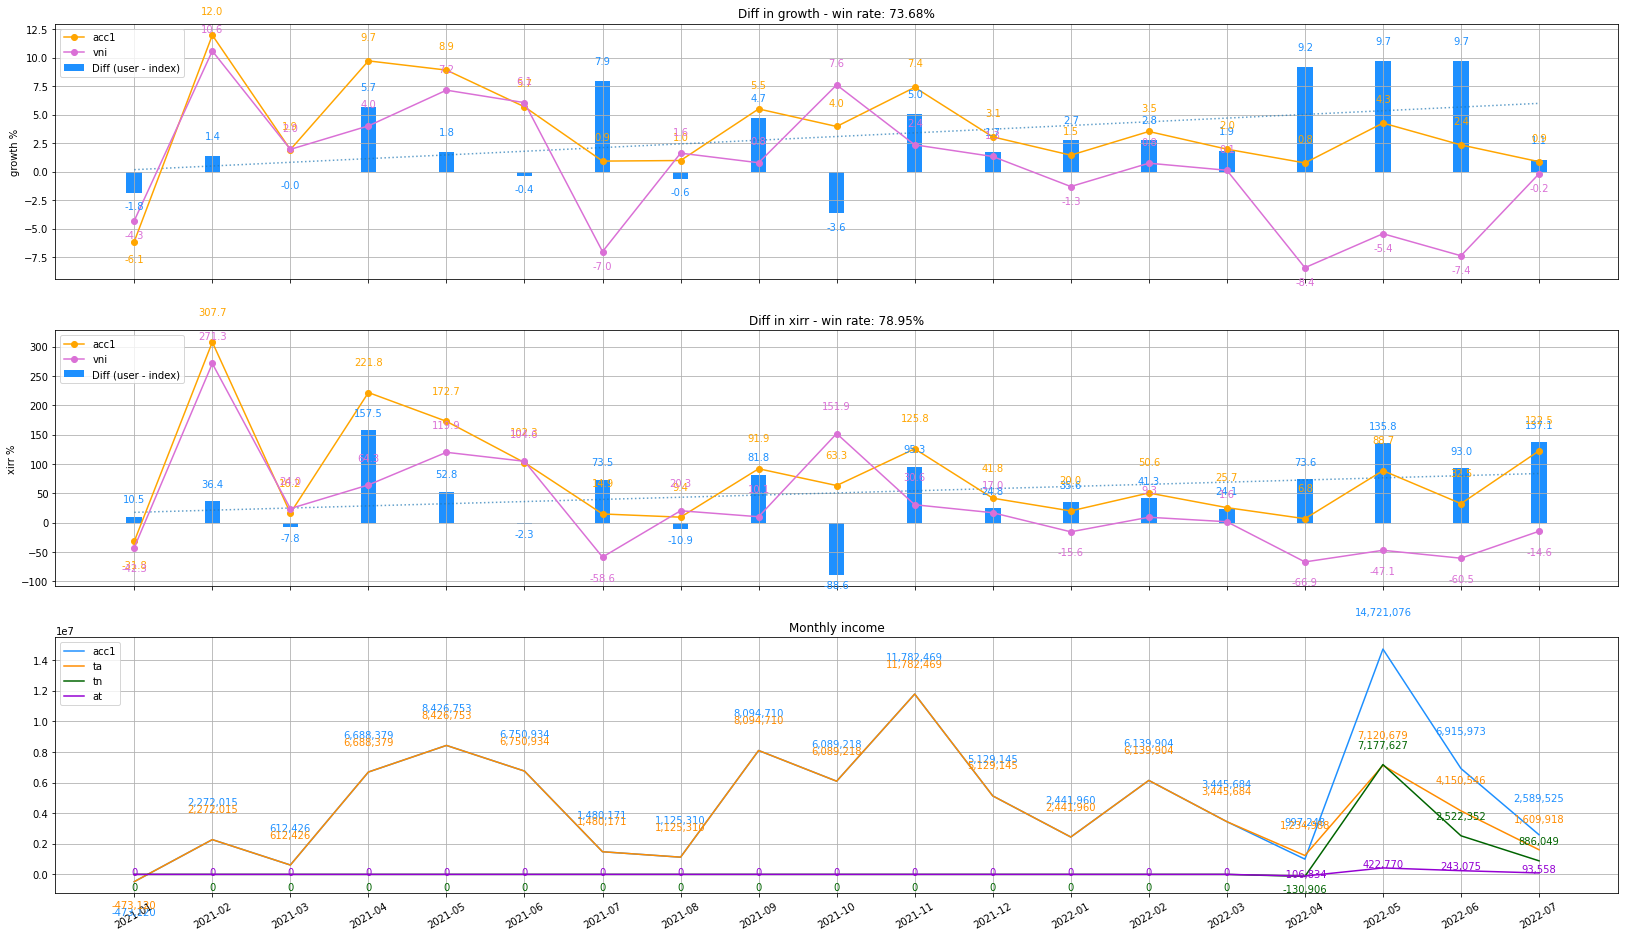

In [18]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


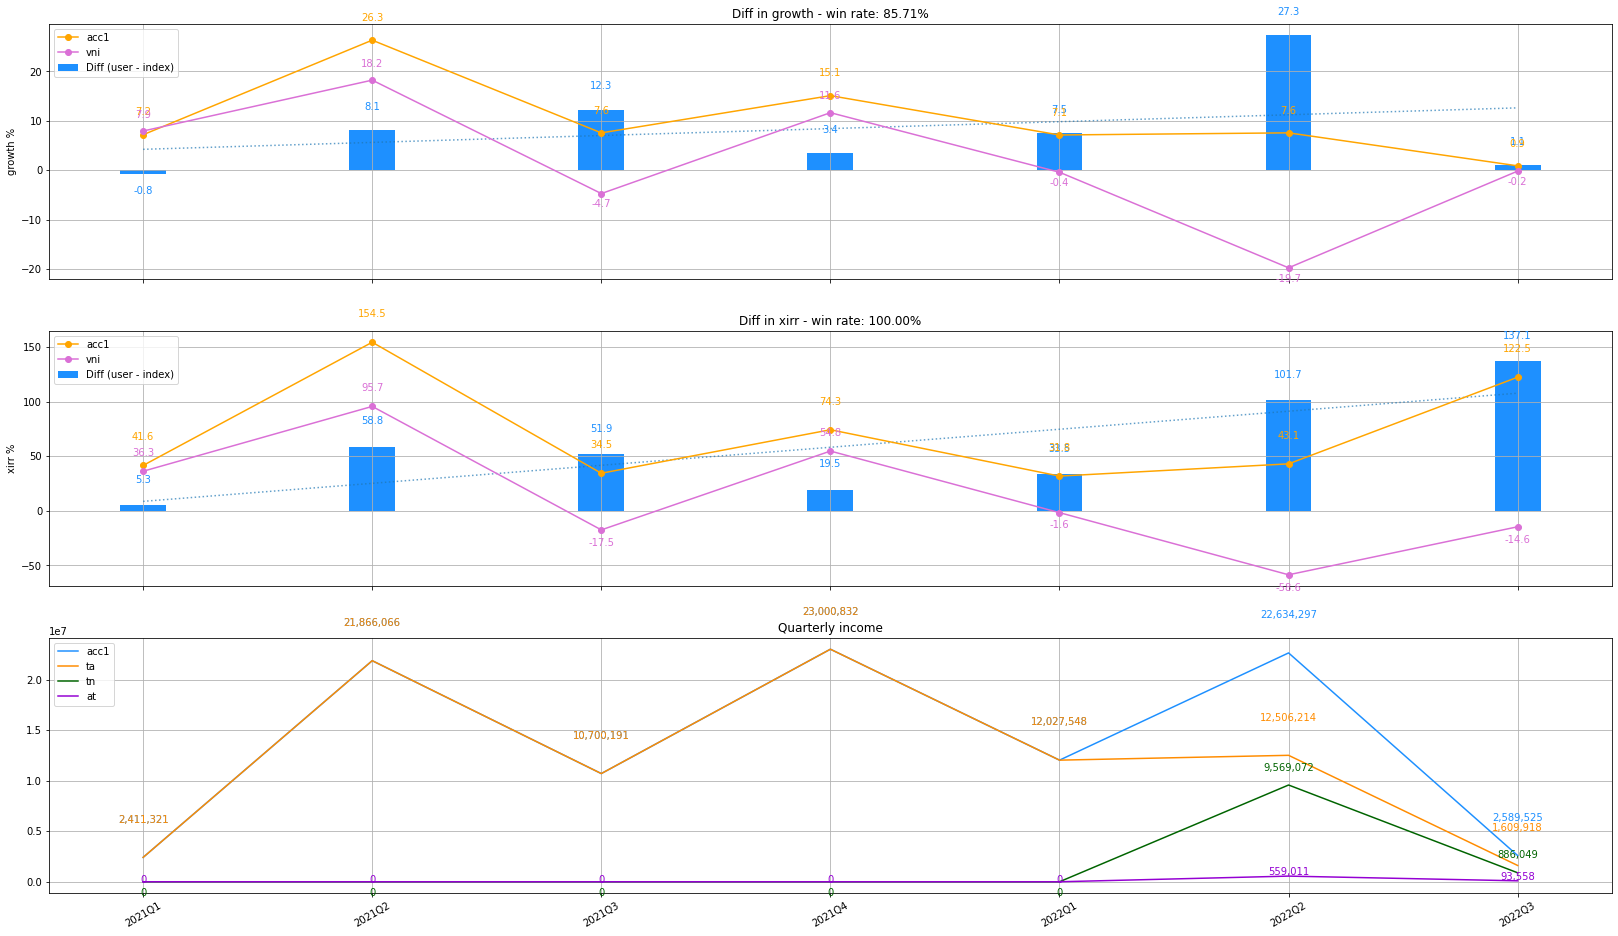

In [19]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


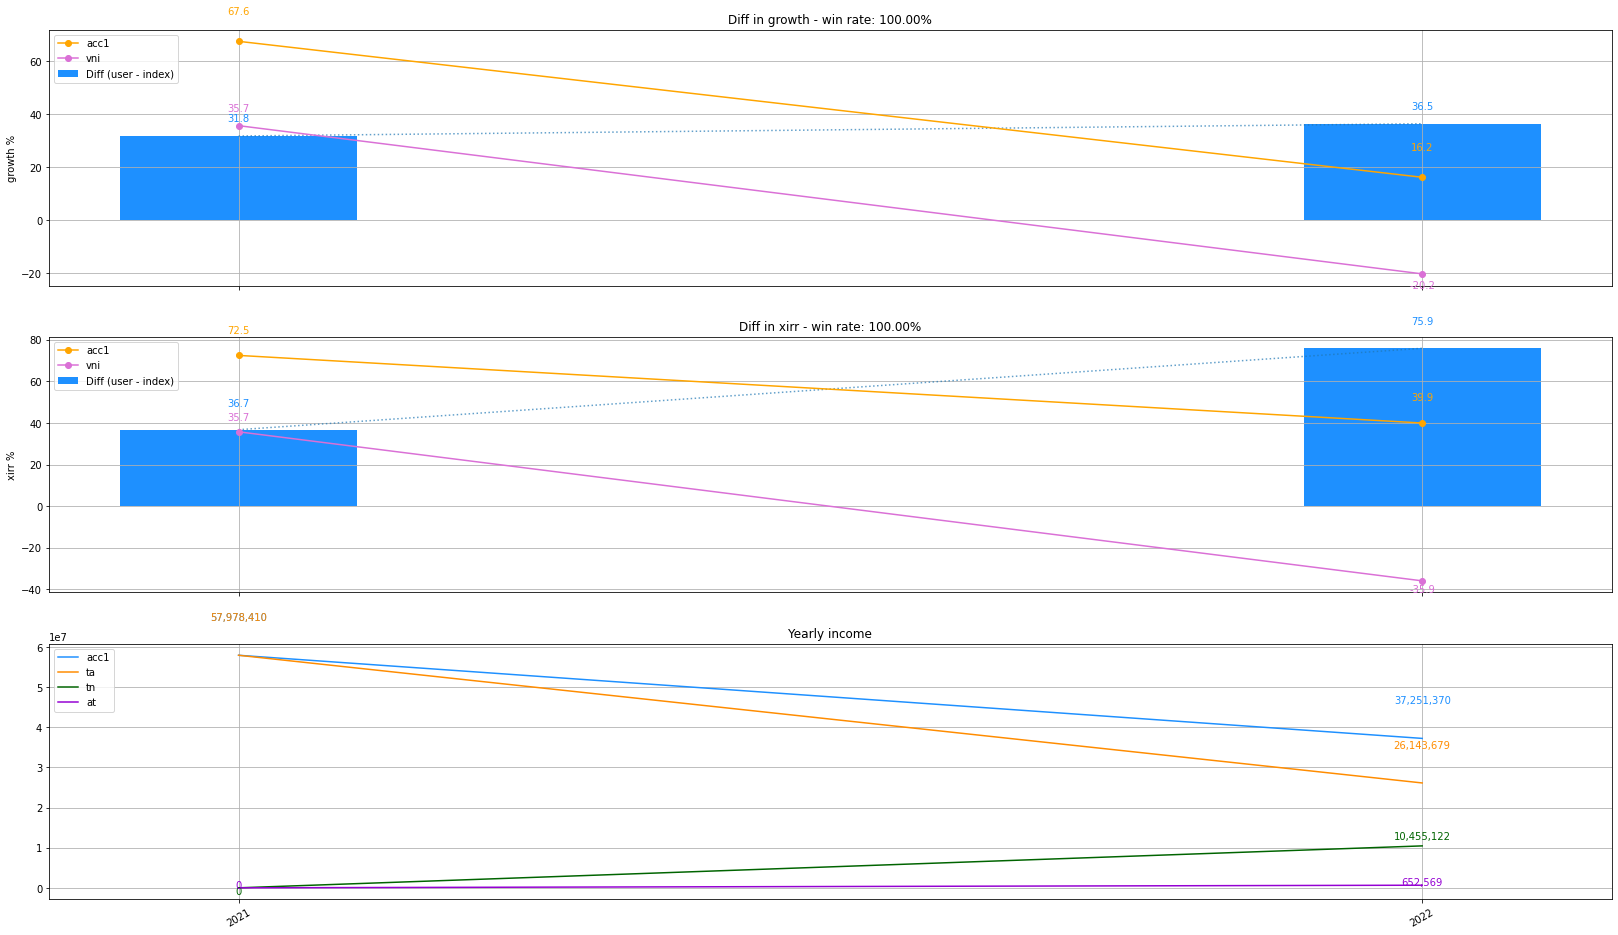

In [20]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


## Fee


In [21]:
processing_user_name = const.TN_USER_NAME
user_fee_p = const.USER_NAME_FEE_DICT[processing_user_name]
user_fee_anchor_date = const.USER_NAME_FEE_ANCHOR_DATE[processing_user_name]


In [22]:
user_df.tail()


,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,at_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,at_day_start,at_share,at_diff,at,acc1_diff_p,acc1_aux_diff_p,ta_diff_p,ta_aux_diff_p,tn_diff_p,tn_aux_diff_p,at_diff_p,at_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-28,1218.10,15.28,296432731,5373744.0,4524000.0,0.0,0.0,4524000.0,291058987.0,1.745448e+08,0.599689,3.222574e+06,1.777674e+08,1.062728e+08,0.365125,1.962087e+06,1.082349e+08,1.024136e+07,0.035187,189083.454223,1.043044e+07,0.018463,1.018463,0.018463,1.018463,0.018463,1.018463,0.018463,1.018463,0.012703,1.012703
2022-06-29,1218.09,-0.01,302280064,5847333.0,0.0,0.0,0.0,0.0,296432731.0,1.777674e+08,0.599689,3.506579e+06,1.812739e+08,1.082349e+08,0.365125,2.135006e+06,1.103699e+08,1.043044e+07,0.035187,205747.412164,1.063619e+07,0.019726,1.019726,0.019726,1.019726,0.019726,1.019726,0.019726,1.019726,-0.000008,0.999992
2022-06-30,1197.60,-20.49,300086662,-2193402.0,0.0,0.0,0.0,0.0,302280064.0,1.812739e+08,0.599689,-1.315358e+06,1.799586e+08,1.103699e+08,0.365125,-8.008654e+05,1.095691e+08,1.063619e+07,0.035187,-77178.225583,1.055901e+07,-0.007256,0.992744,-0.007256,0.992744,-0.007256,0.992744,-0.007256,0.992744,-0.016821,0.983179
2022-07-01,1198.90,1.30,295686968,3431831.0,-1737547.0,9569072.0,0.0,7831525.0,292255137.0,1.816961e+08,0.621704,2.133582e+06,1.838297e+08,1.000000e+08,0.342167,1.174259e+06,1.011743e+08,1.055901e+07,0.036129,123990.093179,1.068300e+07,0.011743,1.011743,0.011743,1.011743,0.011743,1.011743,0.011743,1.011743,0.001086,1.001086
2022-07-04,1195.53,-3.37,294844662,-842306.0,0.0,0.0,0.0,0.0,295686968.0,1.838297e+08,0.621704,-5.236648e+05,1.833060e+08,1.011743e+08,0.342167,-2.882091e+05,1.008860e+08,1.068300e+07,0.036129,-30432.034510,1.065257e+07,-0.002849,0.997151,-0.002849,0.997151,-0.002849,0.997151,-0.002849,0.997151,-0.002811,0.997189


In [23]:
relevant_columns = [
    f"{compare_index}",
    f"{compare_index}_diff_p",
    processing_user_name,
    f"{processing_user_name}_day_start",
    f"{processing_user_name}_diff",
    f"{processing_user_name}_diff_p",
]

fee_df = user_df[relevant_columns]
fee_df = fee_df[fee_df.index >= user_fee_anchor_date]  # type: ignore


fee_df[f"{processing_user_name}_outperf_p"] = (
    fee_df[f"{processing_user_name}_diff_p"] - fee_df[f"{compare_index}_diff_p"]
)
fee_df[f"{processing_user_name}_outperf"] = (
    fee_df[f"{processing_user_name}_day_start"]
    * fee_df[f"{processing_user_name}_outperf_p"]
)
fee_df[f"{processing_user_name}_outperf_fee"] = (
    fee_df[f"{processing_user_name}_outperf"] * user_fee_p
)

fee_df.tail()


,vni,vni_diff_p,tn,tn_day_start,tn_diff,tn_diff_p,tn_outperf_p,tn_outperf,tn_outperf_fee
date,,,,,,,,,
2022-07-01,1198.90,0.001086,1.011743e+08,1.000000e+08,1.174259e+06,0.011743,0.010657,1.065708e+06,159856.221002
2022-07-04,1195.53,-0.002811,1.008860e+08,1.011743e+08,-2.882091e+05,-0.002849,-0.000038,-3.817399e+03,-572.609843


In [24]:
print(f"{processing_user_name}")


cum_profit_df = fee_df[f"{processing_user_name}_diff"].sum()
print(f"\t Cummulative daily profit: \t{cum_profit_df:,.0f}")

cum_outperf = fee_df[f"{processing_user_name}_outperf"].sum()
print(f"\t Cummulative outperf. profit: \t{cum_outperf:,.0f}")

if cum_profit_df>0:
    cum_fee = fee_df[f"{processing_user_name}_outperf_fee"].sum()
    print(f"\t Cummulative outferf. fee: \t{cum_fee:,.0f}")


tn
	 Cummulative daily profit: 	886,049
	 Cummulative outperf. profit: 	1,061,891
	 Cummulative outferf. fee: 	159,284
